<a href="https://colab.research.google.com/github/sametgirgin/Machine-Learning-Intro/blob/master/Introduction_to_Regression_Modelling_w_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Diamond Data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


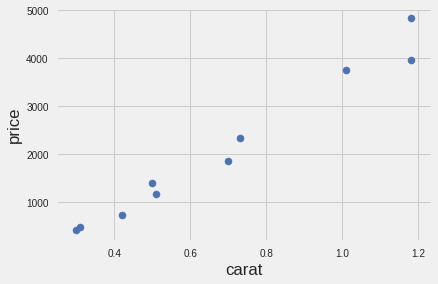

In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

columns=['carat','cut','price']

data=[[0.3, 'Ideal', 422],
     [0.31,'Ideal',489],
     [0.42,'Premium',737],
     [0.5,'Ideal', 1415],
     [0.51,'Premium',1177],
     [0.7, 'Fair', 1865],
     [0.73, 'Fair', 2351],
     [1.01,'Good',3768],
     [1.18,'Very Good', 3965],
     [1.18, 'Ideal', 4838]]

train=pd.DataFrame(data=data, columns=columns)

plt.style.use('fivethirtyeight')
train.plot.scatter(x='carat', y='price',s=50)

In [38]:
train

,carat,cut,price
0,0.30,Ideal,422
1,0.31,Ideal,489
2,0.42,Premium,737
3,0.50,Ideal,1415
4,0.51,Premium,1177
5,0.70,Fair,1865
6,0.73,Fair,2351
7,1.01,Good,3768
8,1.18,Very Good,3965
9,1.18,Ideal,4838


In [0]:
#Nearest Neighbors Model (K-Model) 1.MODEL

In [40]:
features=['carat']
target='price'

from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor (n_neighbors=2)

model.fit(train[features], train[target])
#Nearest Neighbor Model 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [41]:
#Predict price of 0.7 carat diamond
model.predict([[0.7]])

array([2108.])

In [42]:
#Predict price of 0.9 carat diamond
model.predict([[0.9]])

array([3059.5])

In [43]:
#Predict price of 1.2 carat diamond
model.predict([[1.2]])

array([4401.5])

In [44]:
#Let's get multiple predictions at the same time
model.predict([[0.7],[0.9],[1.2]])

array([2108. , 3059.5, 4401.5])

In [0]:
#Lets get prediction for each 1/100 carat from 0 to 1.3 carats

#[[0.0],[0.01],[0.02].......[1.28],[1,29]]

carats=[[c/100] for c in range(130)]
predictions=model.predict(carats)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


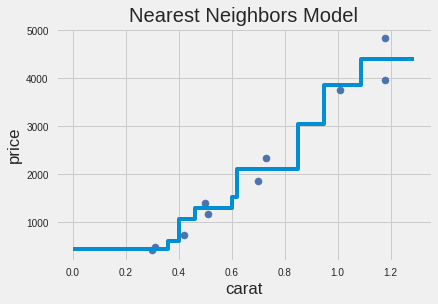

In [46]:
#Plot these predictions
train.plot.scatter(x='carat', y='price', s=50)
plt.step(carats,predictions)
plt.title('Nearest Neighbors Model');

In [0]:
#LINEAR REGRESSION 2.MODEL
#The first two lines of code are different, but the rest of the cell is the same

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


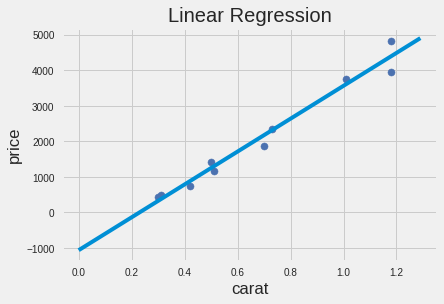

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(train[features],train[target])
predictions=model.predict(carats)
train.plot.scatter(x='carat',y='price',s=50)
plt.plot(carats,predictions)
plt.title('Linear Regression'); 

In [0]:
#We can get the equation for the line

In [50]:
model.coef_,model.intercept_

(array([4626.92985203]), -1062.1200187896338)

In [0]:
# y=mx+b
# price=4627*carat-1062

In [0]:
##POLYNOMIAL REGRESSION-the first few lines are different, but the rest of the cell is the same 
#This model is more flexible-too flexible "OVERFITS" 3. MODEL

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


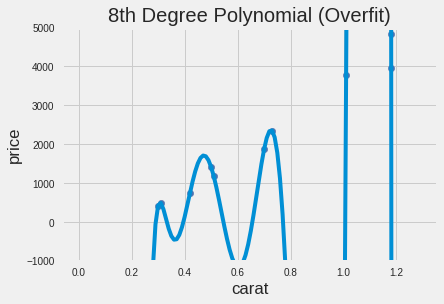

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model=make_pipeline(PolynomialFeatures(degree=8),LinearRegression())

model.fit(train[features],train[target])
predictions=model.predict(carats)
train.plot.scatter(x='carat',y='price',s=40)
plt.plot(carats,predictions)
plt.title('8th Degree Polynomial (Overfit)')
plt.ylim((-1000,5000)); 

In [0]:
#Bu model çalışılan verilere  daha mükemmel uyuyor ama bazı tahminleri sıkıntılı

In [55]:
model.predict([[0.9]])

array([-32870.7744747])

In [56]:
#These are the polynomial coefficients
print('Intercept', model.named_steps['linearregression'].intercept_.astype(int))
print(pd.Series(model.named_steps['linearregression'].coef_.astype(int),
                model.named_steps['polynomialfeatures'].get_feature_names('c')))

Intercept -7166492
1               0
c       110806306
c^2    -726566754
c^3    2636594561
c^4   -5788569525
c^5    7872386982
c^6   -6477657062
c^7    2949503216
c^8    -569338231
dtype: int64


In [0]:
##'Dummy' Baseline-(This model is 'UNDERFITS') 4. MODEL

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


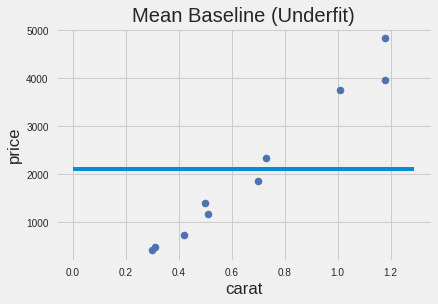

In [58]:
from sklearn.dummy import DummyRegressor
model=DummyRegressor(strategy='mean')

model.fit(train[features],train[target])
predictions=model.predict(carats)
train.plot.scatter(x='carat',y='price',s=50)
plt.plot(carats,predictions)
plt.title('Mean Baseline (Underfit)');

In [0]:
#Test Data: 
#How to choose the best model? To avoid overfitting, use different 
#data for training and testing

In [0]:
data=[[0.3, 'Ideal', 432],
     [0.34,'Ideal',687],
     [0.37,'Premium',1124],
     [0.4,'Good', 720],
     [0.51,'Ideal',1397],
     [0.51, 'Very Good', 1284],
     [0.59, 'Ideal', 1437],
     [0.7,'Ideal',3419],
     [0.9,'Premium', 3484],
     [0.9, 'Fair', 2964]]

test=pd.DataFrame(data=data,columns=columns)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


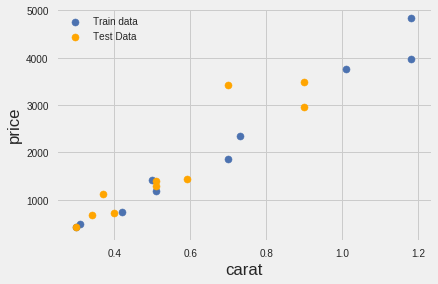

In [61]:
ax=train.plot.scatter(x='carat', y='price',s=50)
test.plot.scatter(x='carat',y='price',s=50,color='orange',ax=ax)
plt.legend(['Train data','Test Data']);

In [0]:
#COMPARE FOUR MODELS: How well does each model fit the training and test data?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


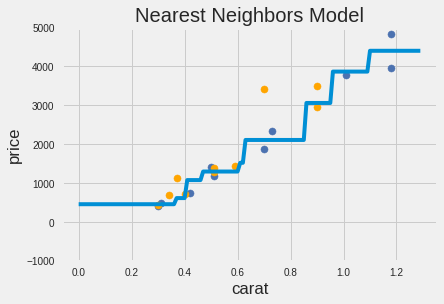

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Train Error: $ 210.0
Test Error: $ 296.0 



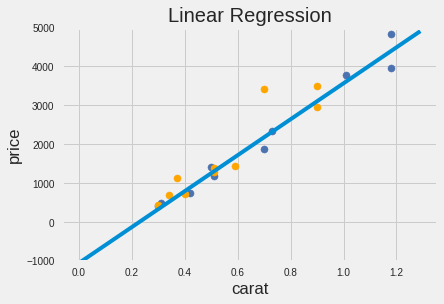

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Train Error: $ 202.0
Test Error: $ 293.0 



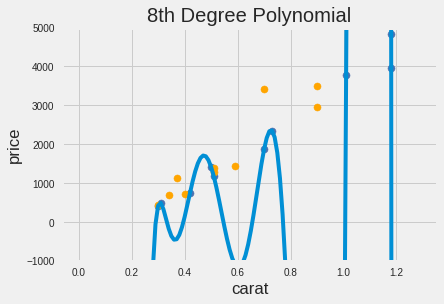

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Train Error: $ 87.0
Test Error: $ 7963.0 



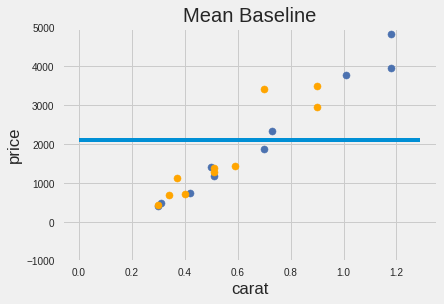

Train Error: $ 1302.0
Test Error: $ 1120.0 



In [63]:
#Use mean absolute error to compare models
from sklearn.metrics import mean_absolute_error

#Comparison of the four models

models=[('Nearest Neighbors Model', KNeighborsRegressor(n_neighbors=2)), 
       ('Linear Regression', LinearRegression()),
       ('8th Degree Polynomial', make_pipeline(PolynomialFeatures(degree=8),LinearRegression())),
       ('Mean Baseline', DummyRegressor(strategy='mean'))]
for name, model in models:
    
    #Plot training data (blue dots)
    ax=train.plot.scatter(x='carat', y='price',s=50)
    
    #Plot testing data (orange dots)
    test.plot.scatter(x='carat',y='price', s=50, color='orange', ax=ax)
    
    #Train model: 
    model.fit(train[features],train[target])
    
    #Plot predictions(blue line)
    plt.plot(carats,model.predict(carats))
    plt.title(name)
    plt.ylim((-1000,5000))
    plt.show()
    
    #Calculate mean absolute error on the training data
    #average distance between line and blue dots
    y_true=train[target]
    y_pred=model.predict(train[features])
    train_error=mean_absolute_error(y_true,y_pred)
    #Calculate mean absolute error on the test data
    #average distance between line and orange dots
    y_true=test[target]
    y_pred=model.predict(test[features])
    test_error=mean_absolute_error(y_true,y_pred)  
    
    #Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error),'\n')

In [0]:
#MEAN ABSOLUTE ERROR
#The first step is to calculate the difference between predicted values and true values

In [65]:
#Error for Baseline Model
predicted=train.price.mean()
true=train.price
(predicted-true)

0    1680.7
1    1613.7
2    1365.7
3     687.7
4     925.7
5     237.7
6    -248.3
7   -1665.3
8   -1862.3
9   -2735.3
Name: price, dtype: float64

In [66]:
#Absolute Error for Baseline Model
(predicted-true).abs()

0    1680.7
1    1613.7
2    1365.7
3     687.7
4     925.7
5     237.7
6     248.3
7    1665.3
8    1862.3
9    2735.3
Name: price, dtype: float64

In [67]:
#Mean absolute value of error for Baseline Model:
(predicted-true).abs().mean()

1302.2399999999998

In [68]:
#if we calculate the Mean Error
(predicted-true).mean()

-1.8189894035458566e-13

In [69]:
#MORE FEATURES:
train

,carat,cut,price
0,0.30,Ideal,422
1,0.31,Ideal,489
2,0.42,Premium,737
3,0.50,Ideal,1415
4,0.51,Premium,1177
5,0.70,Fair,1865
6,0.73,Fair,2351
7,1.01,Good,3768
8,1.18,Very Good,3965
9,1.18,Ideal,4838


In [70]:
features=['carat','cut']
target='price'
model=LinearRegression()
model.fit(train[features],train[target])#cut is not a number

ValueError: ignored

In [71]:
train

,carat,cut,price
0,0.30,Ideal,422
1,0.31,Ideal,489
2,0.42,Premium,737
3,0.50,Ideal,1415
4,0.51,Premium,1177
5,0.70,Fair,1865
6,0.73,Fair,2351
7,1.01,Good,3768
8,1.18,Very Good,3965
9,1.18,Ideal,4838


In [0]:
#ENCODE ORDINAL VARIABLE FROM STRINGS TO NUMBERS

In [73]:
cut_ranks={'Fair': 1,'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut=train.cut.map(cut_ranks)
test.cut=test.cut.map(cut_ranks)
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


In [0]:
#DECISION TREE: 

In [75]:
features=['carat','cut']
target='price'

#Fit Model
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='mae')
model.fit(train[features],train[target])

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:
def error(): 
    #mean absolute error on the training data
    y_true=train[target]
    y_pred=model.predict(train[features])
    train_error=mean_absolute_error(y_true,y_pred)
    
    #calculate mean absolute error on the test data
    y_true=test[target]
    y_pred=model.predict(test[features])
    test_error=mean_absolute_error(y_true,y_pred)
    
    #Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()

Train Error: $ 0.0
Test Error: $ 473.0


In [0]:
#VISUALIZE THE TREE 

In [78]:
#Install Graphviz...
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


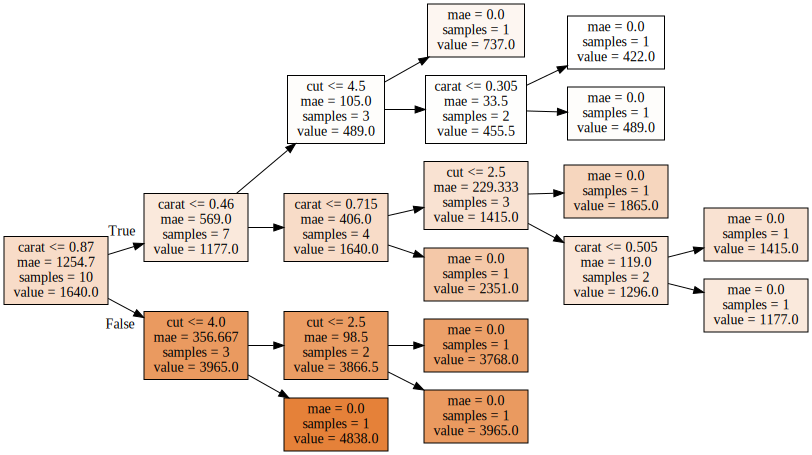

In [79]:
import graphviz
from sklearn.tree import export_graphviz

dot_data=export_graphviz(model,out_file=None, feature_names=features,filled=True, rotate=True)
graphviz.Source(dot_data) # It caused some problem in jupyter notebook and gave some errors abour the dot PATH

#splitting the data into small groups...


In [80]:
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


In [0]:
#Prune The Tree
#min_samples_leaf parameter to prune the tree (to reduce the overfiting)

In [82]:
model=DecisionTreeRegressor(criterion='mae', min_samples_leaf=2)
model.fit(train[features],train[target])
error()

Train Error: $ 211.0
Test Error: $ 498.0


In [0]:
#The test error become worser...

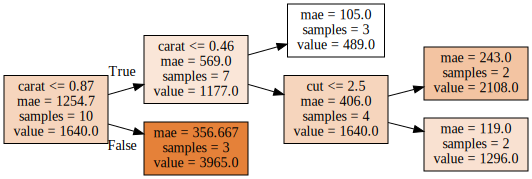

In [84]:
dot_data=export_graphviz(model,out_file=None,feature_names=features, filled=True, rotate=True)
graphviz.Source(dot_data)

In [0]:
#Multiple Regression:(the best model so far)

In [87]:
model=LinearRegression()
model.fit(train[features],train[target])
error()


Train Error: $ 171.0
Test Error: $ 257.0


In [88]:
model.coef_,model.intercept_

(array([4770.55908807,   82.45286436]), -1448.947441495462)

In [0]:
#price=4771*carat+82*cut-1449 (Equation of the price)

In [0]:
#Predict the price of a 0.9 carat diamond with "Very Good" (3)cut 
#USING The Formula:

In [93]:
4771*0.9+82*3-1449

3090.9000000000005

In [95]:
model.predict([[0.9,3]])

array([3091.91433084])

In [96]:
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


In [97]:
test

,carat,cut,price
0,0.30,5,432
1,0.34,5,687
2,0.37,4,1124
3,0.40,2,720
4,0.51,5,1397
5,0.51,3,1284
6,0.59,5,1437
7,0.70,5,3419
8,0.90,4,3484
9,0.90,1,2964


In [99]:
train.shape # totally 30 numbers in dataset

(10, 3)

In [101]:
import seaborn as sns 
sns.load_dataset('diamonds').shape#about half a million nmbers to search for patterns by hand

(53940, 10)